#**E-Commerce Data Analysis**

#
---
---

# 1. Getting Ready

## 1.0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1. Describe Dataset

This data is about E-commerce and customers' behaviour, imported from [Kaggle](https://www.kaggle.com)

## 1.2. Ask Quetsions

1. Which year has the most orders?
2. Which month has the most orders?
3. Which state has the highest percentage of orders over the three years?
4. Which state has the highest percentage of orders in each year?
4. Which status is the most common over the three years?
5. Which status is common in each year?
5. Which category is most sold over the three years?
6. Which category is most sold in each year?
7. Which Brand is most sold over the three years?
8. Which Brand is most sold in each year?
9. What is the average total sales over the three years?
10. What is the average total costs over the three years?
11. What is the average profit (or loss) over the three years?
12. What is the average total sales in each year?
13. What is the average total costs in each year?
14. What is the average profit (or loss) in each year?
15. What is the relation between quantity sold and the profit (or loss)?
16. What is the relation between total sales and the profit (or loss)?
17. What is the relation between total costs and the profit (or loss)?

## 1.3. Import the dataset

In [2]:
df = pd.read_csv("Online-eCommerce.csv")

#
---
---

# 2. Wrangling Data

## 2.1. Assessing Data

### 2.1.1. View Cleanliness Problems

#### 2.1.1.1. Check DataTypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB


**The data has 14 column x 5110 rows. Some data are of wrong dtypes, such as:**
1. Order_number: This is a ID. It should be of type Object
2. Order_Date: This is a date. It should be of dtype DateTime64  

#### 2.1.1.2. Check Completeness

In [4]:
df.isna().sum()

,0
Order_Number,15
State_Code,15
Customer_Name,15
Order_Date,15
Status,15
Product,15
Category,15
Brand,15
Cost,15
Sales,15


**All fields have 15 missing values which suggests that there is 15 empty rows**

In [5]:
df.isna().all(axis=1).sum()

np.int64(15)

**There are indeed 15 totally empty rows**

#### 2.1.1.3. Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(14)

**There are 14 duplicate rows**

#### 2.1.1.4. Check Accuracy

In [7]:
df.describe()

,Order_Number,Cost,Sales,Quantity,Total_Cost,Total_Sales
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,141921.000000,6066.123651,7885.960746,2.486948,14991.778214,19489.311678
std,1470.944141,3952.022039,5137.628651,1.113581,12574.918427,16347.393955
min,139374.000000,350.000000,455.000000,1.000000,350.000000,455.000000
25%,140647.500000,2100.000000,2730.000000,2.000000,4500.000000,5850.000000
50%,141921.000000,6550.000000,8515.000000,2.000000,10720.000000,13936.000000
75%,143194.500000,8500.000000,11050.000000,3.000000,22950.000000,29835.000000
max,144468.000000,14500.000000,18850.000000,4.000000,58000.000000,75400.000000


**No Illogical values or outliers detected**

####2.1.1.5. Check Consistency

In [8]:
df['Category'].value_counts()

,count
Category,
Monitor,749
CPU,600
Mouse,599
SSD,450
Graphic Card,450
Cabinet,449
Keyboard,449
HDD,449
RAM,300


**Motherboard is repeated twice in this column**

In [9]:
df['Brand'].value_counts()

,count
Brand,
Samsung,1199
Dell,898
Intel,600
Nvidia,450
Hynix,450
Asus,449
Gigabyte,300
Western Digital,299
Seagate,150


**All data are standardized in this column**

In [10]:
df['State_Code'].value_counts()

,count
State_Code,
MH,904
GJ,476
UP,458
BR,254
DL,249
TR,187
TN,185
CH,95
SK,91


**Data is also standardized in this field**

### 2.1.2. View Tidiness Problems

In [11]:
df.sample(2)

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
3194,142553.0,PY,Rahul Kashyap,11/11/2021,Shipped,101 GB DDR4 RAM,RAM,Samsung,2650.0,3445.0,1.0,2650.0,3445.0,Aarvi Gupta
1932,141291.0,DH,Vinod Mehta,29/03/2021,Processing,60 GB DDR4 Ram,NIC,Hynix,1680.0,2184.0,1.0,1680.0,2184.0,Vijay Singh


**All fields are committed to the basic Tidiness rules**

## 2.2. Cleaning Data

### 2.2.1. Fix invalid dtypes

In [12]:
df['Order_Number'] = df['Order_Number'].astype('object')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="mixed")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Number         5095 non-null   object        
 1   State_Code           5095 non-null   object        
 2   Customer_Name        5095 non-null   object        
 3   Order_Date           5095 non-null   datetime64[ns]
 4   Status               5095 non-null   object        
 5   Product              5095 non-null   object        
 6   Category             5095 non-null   object        
 7   Brand                5095 non-null   object        
 8   Cost                 5095 non-null   float64       
 9   Sales                5095 non-null   float64       
 10  Quantity             5095 non-null   float64       
 11  Total_Cost           5095 non-null   float64       
 12  Total_Sales          5095 non-null   float64       
 13  Assigned Supervisor  5095 non-nul

**The problem was fixed**

### 2.2.2. Fix incompleteness issue

In [14]:
df = df.dropna(axis=0, how='all')

In [15]:
df.isna().sum().sum()

np.int64(0)

**No more missing values**

### 2.2.3. Fix duplicates

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

np.int64(0)

**No more duplicate rows**

### 2.2.4. Fix inconsistency issue

In [18]:
df['Category'] = df['Category'].replace('MotherBoard', 'Motherboard')

In [19]:
df['Category'].value_counts()

,count
Category,
Monitor,749
CPU,600
Mouse,599
SSD,450
Graphic Card,450
HDD,449
Cabinet,449
Keyboard,449
RAM,300


**Data is standardized in this column**

#
---
---

# 3. Getting the data ready for the analysis

## 3.1. Make a year column

In [20]:
df['Year'] = df['Order_Date'].dt.year

In [21]:
df['Year'].value_counts()

,count
Year,
2022,1732
2021,1717
2020,1646


## 3.2. Make a months column

In [22]:
df['Month'] = df['Order_Date'].dt.month

In [23]:
df['Month'].value_counts()

,count
Month,
3,1927
4,539
7,440
10,429
5,385
12,384
11,291
9,200
6,176


## 3.3. Make a profits column

In [24]:
df['Profit'] = df['Total_Sales'] - df['Total_Cost']

## 3.4. View sample data

In [25]:
df.sample(2)

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor,Year,Month,Profit
4961,144320.0,WB,Rohan Kale,2022-10-12,Delivered,"17"" LCD Display",Monitor,Samsung,8250.0,10725.0,2.0,16500.0,21450.0,Ajay Sharma,2022,10,4950.0
529,139888.0,GJ,Rhushikesh Mane,2020-03-31,Delivered,Standard ATX motherboard,Motherboard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aarvi Gupta,2020,3,9180.0


## 3.5. View statistical data

In [26]:
df.describe()

,Order_Date,Cost,Sales,Quantity,Total_Cost,Total_Sales,Year,Month,Profit
count,5095,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,2021-06-13 21:48:00.706574848,6066.123651,7885.960746,2.486948,14991.778214,19489.311678,2021.016879,5.683611,4497.533464
min,2020-01-02 00:00:00,350.000000,455.000000,1.000000,350.000000,455.000000,2020.000000,1.000000,105.000000
25%,2020-09-05 00:00:00,2100.000000,2730.000000,2.000000,4500.000000,5850.000000,2020.000000,3.000000,1350.000000
50%,2021-04-30 00:00:00,6550.000000,8515.000000,2.000000,10720.000000,13936.000000,2021.000000,4.000000,3216.000000
75%,2022-03-29 00:00:00,8500.000000,11050.000000,3.000000,22950.000000,29835.000000,2022.000000,9.000000,6885.000000
max,2022-12-31 00:00:00,14500.000000,18850.000000,4.000000,58000.000000,75400.000000,2022.000000,12.000000,17400.000000
std,NaN,3952.022039,5137.628651,1.113581,12574.918427,16347.393955,0.814155,3.283131,3772.475528


#
---
---

# 4. Data Analysis and Visualization

## Question 1: Which year has the most orders?

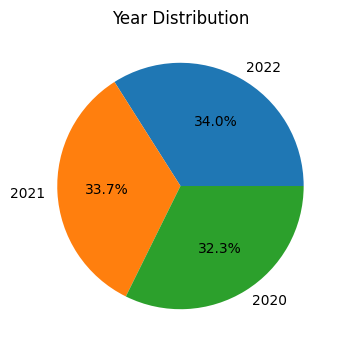

In [27]:
plt.figure(figsize=(8, 4))
plt.pie(df['Year'].value_counts(), labels=df['Year'].value_counts().index, autopct='%1.1f%%')
plt.title('Year Distribution')
plt.show()

**2022 was the most year having orders with a percentage of 34%**

## Question 2: Which month has the most orders?

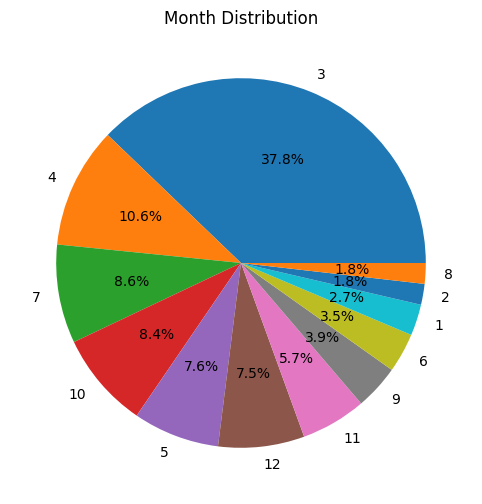

In [28]:
plt.figure(figsize=(10, 6))
plt.pie(df['Month'].value_counts(), labels=df['Month'].value_counts().index, autopct='%1.1f%%')
plt.title('Month Distribution')
plt.show()

**The graph shows that March has the highest number of orders, with a percentage of 37.8%, while August and February have the least number of orders, with a percentage of 1.8%**

## Question 3: Which state has the highest percentage of orders over the three years?

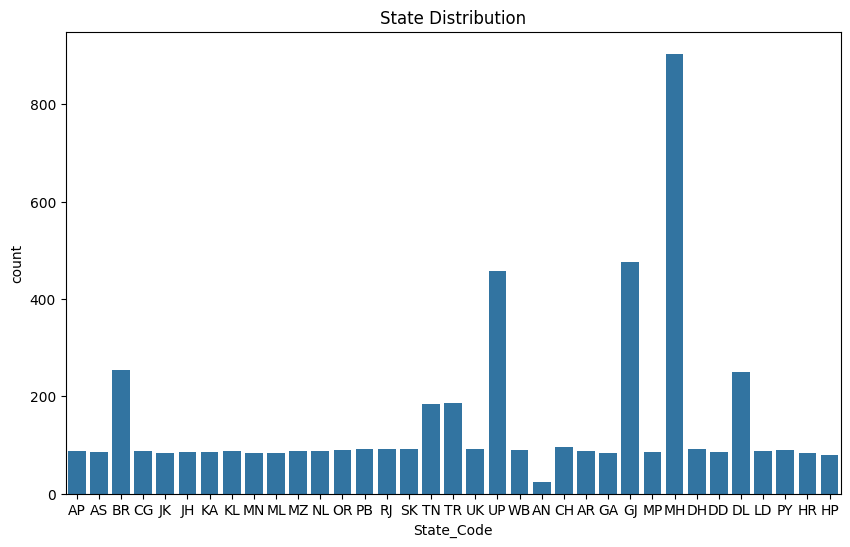

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State_Code')
plt.title('State Distribution')
plt.show()

**The state MH has the highest number of orders, while the state AN has the least number of orders**

## Question 4: Which state has the highest percentage of orders in each year?

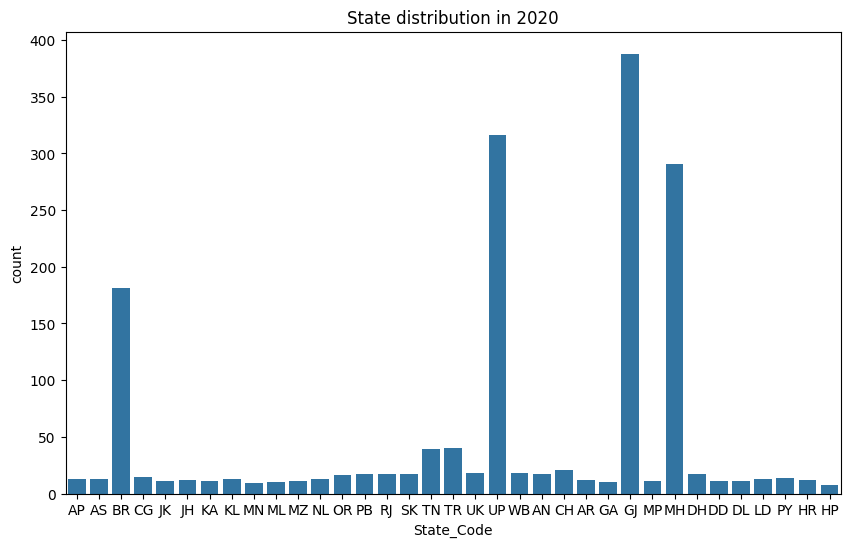

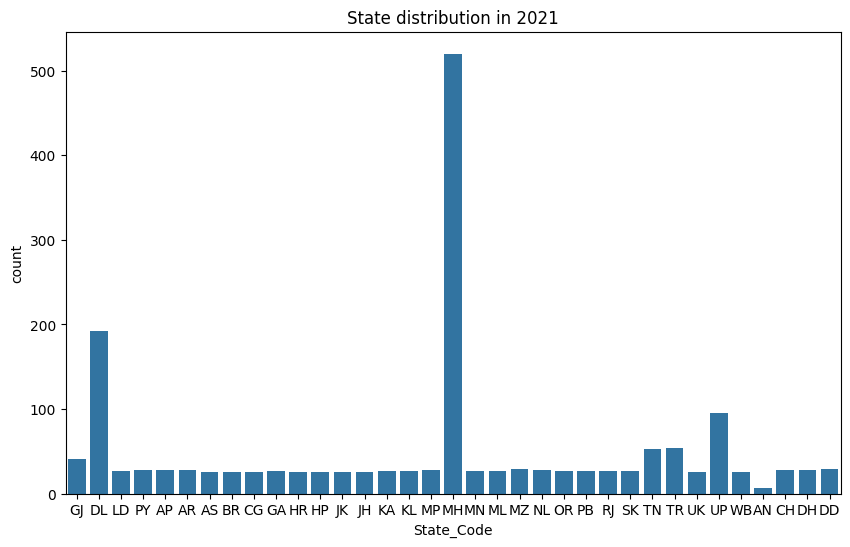

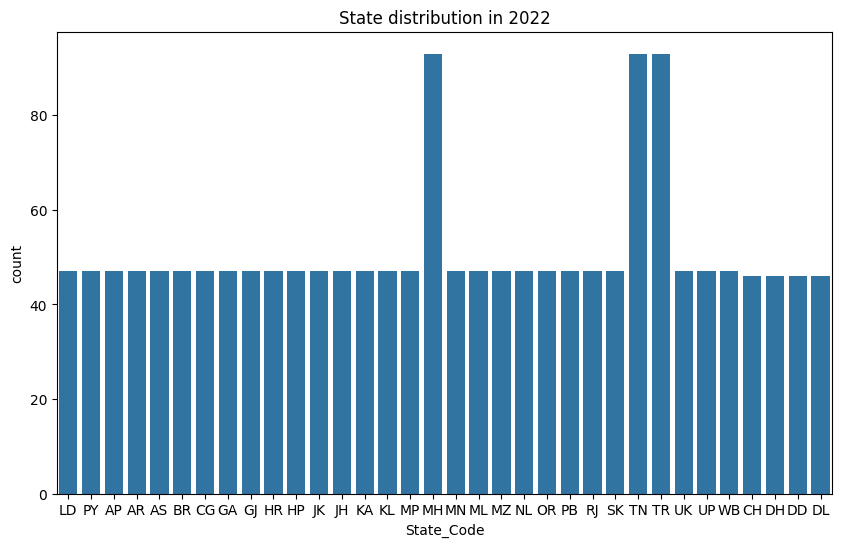

In [30]:
years = [2020, 2021, 2022]
for year in years:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df[df['Year'] == year], x='State_Code')
    plt.title(f'State distribution in {year}')
    plt.show()
    print() # For easier visibility

<strong>In 2020, GJ state had the highest orders<br>
In 2021, MH state had the highest orders<br>
In 2022, MH, TN, TR had the highest orders </strong>

## Question 5: Which status is the most common over the three years?

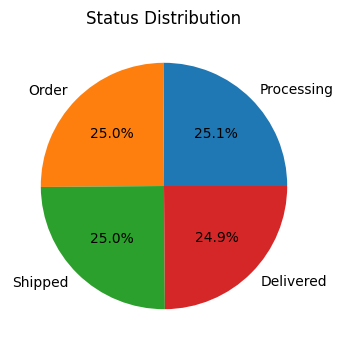

In [31]:
plt.figure(figsize=(8, 4))
plt.pie(df['Status'].value_counts(), labels=df['Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Status Distribution')
plt.show()

**All statuses (Order, shipped, delivered, and processing) are almost equally common among the orders' data**

## Question 6: Which status is common in each year?

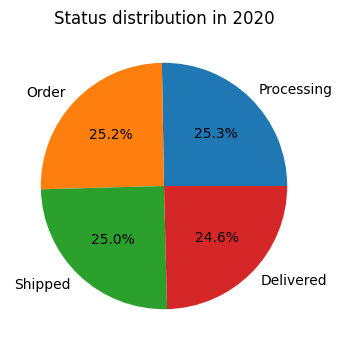

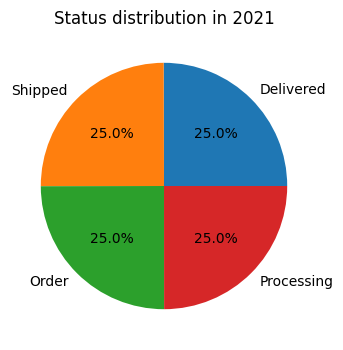

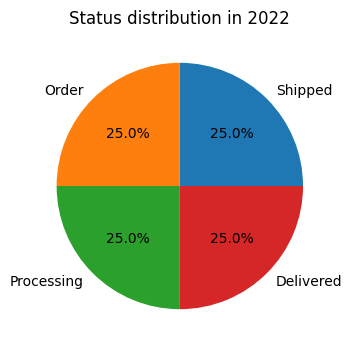

In [32]:
for year in years:
  plt.figure(figsize=(8, 4))
  plt.pie(df[df['Year'] == year]['Status'].value_counts(), labels=df[df['Year'] == year]['Status'].value_counts().index, autopct='%1.1f%%')
  plt.title(f'Status distribution in {year}')
  plt.show()
  print() # For visisbility

<b>In 2020, the Processing status was slightly higher than the other statuses

In both 2021 and 2022, the four statuses are equally the same </b>

## Question 7: Which category is most sold over the three years?

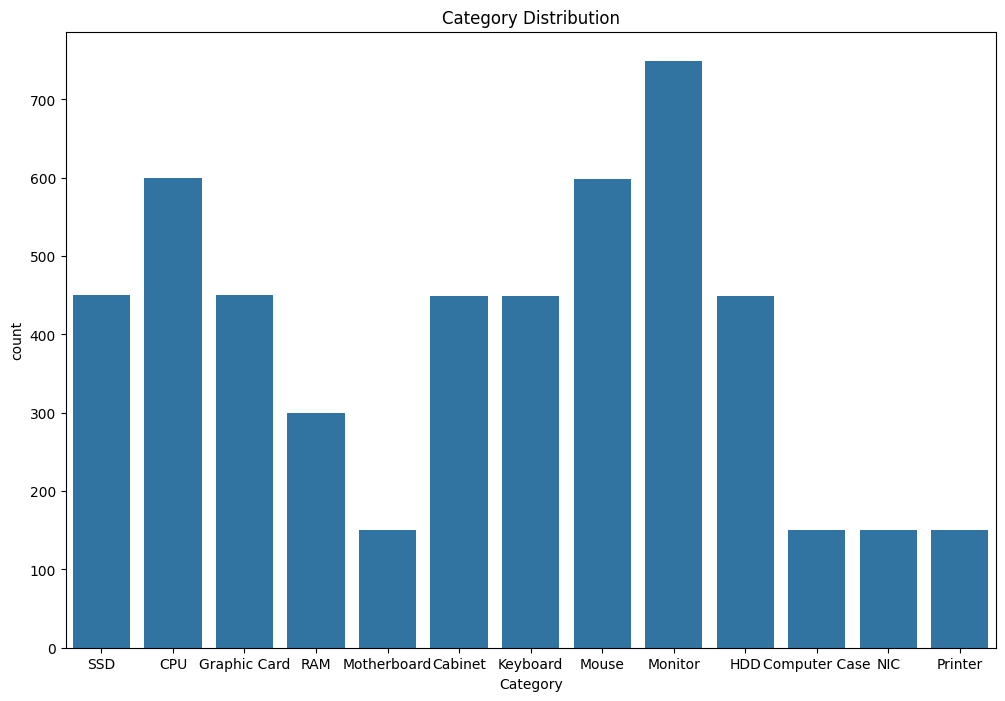

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.show()

**Monitors are the most common category over the three years**

## Question 8: Which category is most sold in each year?

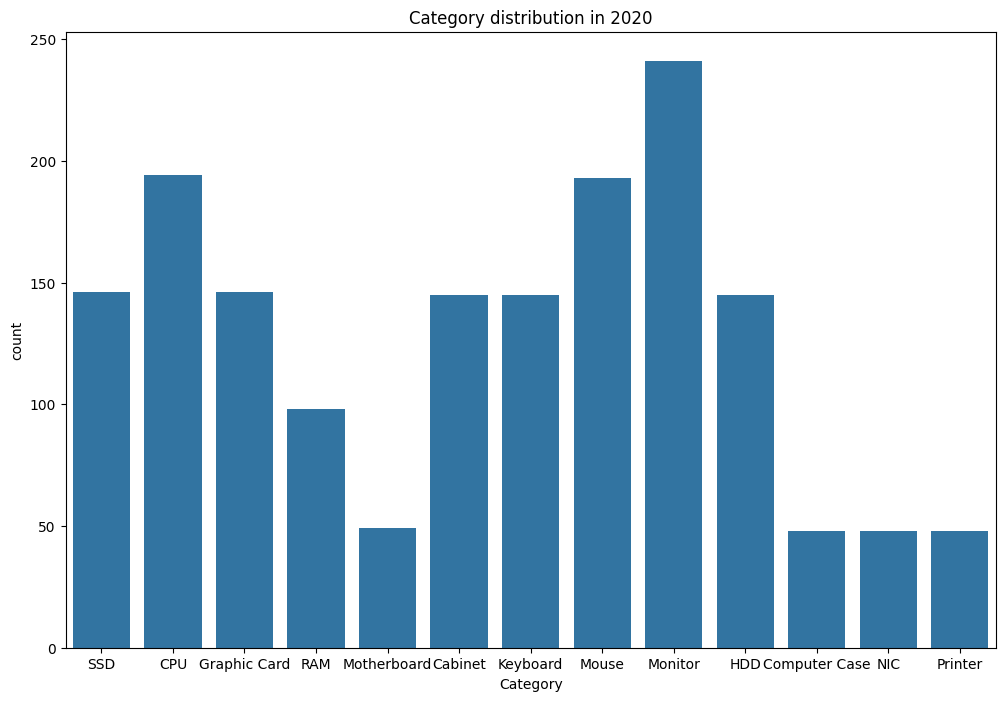

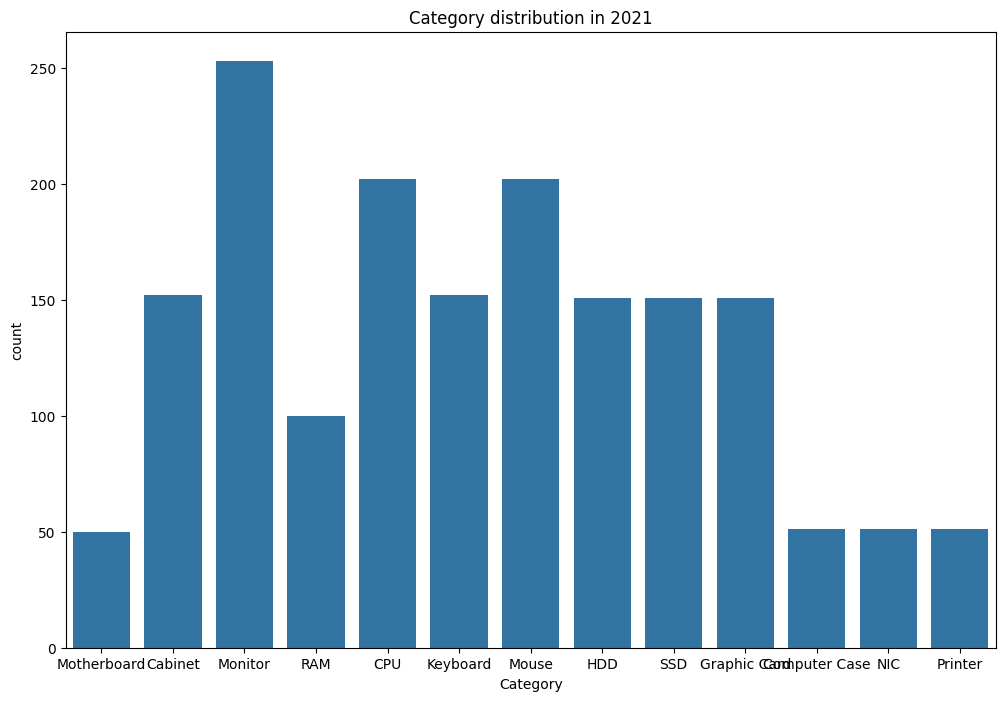

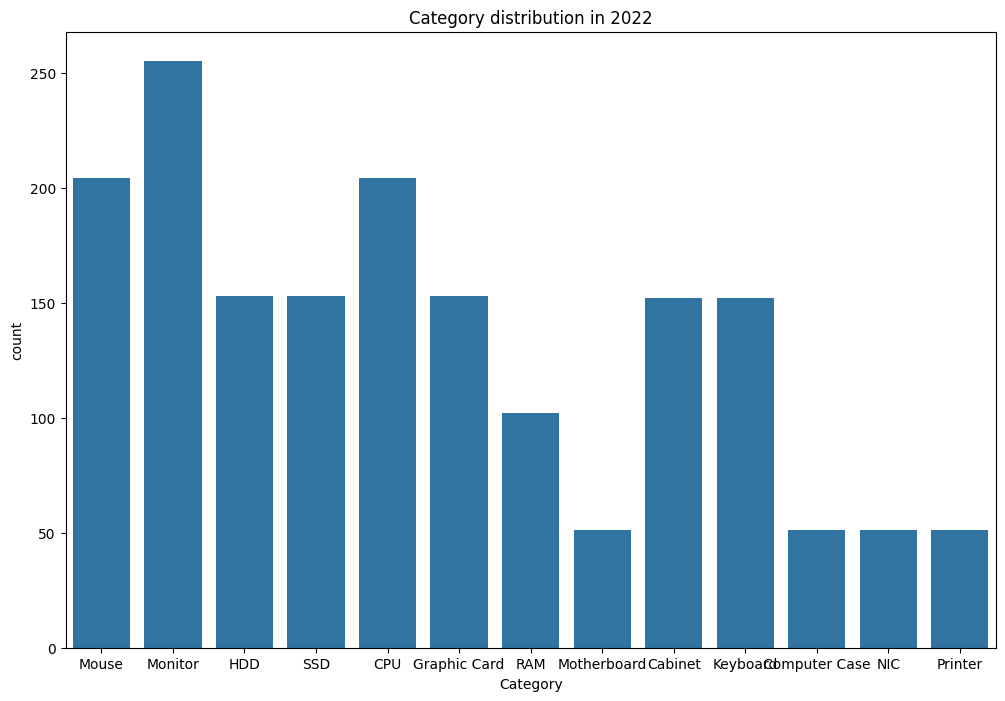

In [34]:
for year in years:
  plt.figure(figsize=(12, 8))
  sns.countplot(data=df[df['Year'] == year], x='Category')
  plt.title(f'Category distribution in {year}')
  plt.show()
  print() # For visisbility

**In each of the three years, Monitors are the highest sold category**

## Question 9: Which Brand is most sold over the three years?

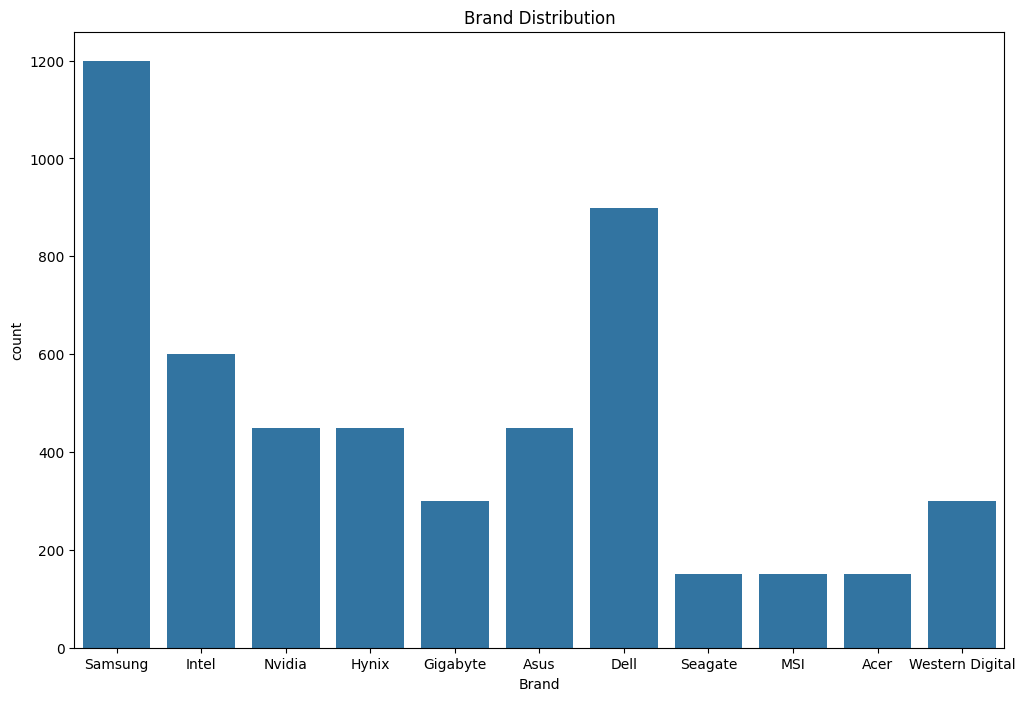

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Brand')
plt.title('Brand Distribution')
plt.show()

**Samsung is the most sold brand over the three years**

## Question 10: Which Brand is most sold in each year?

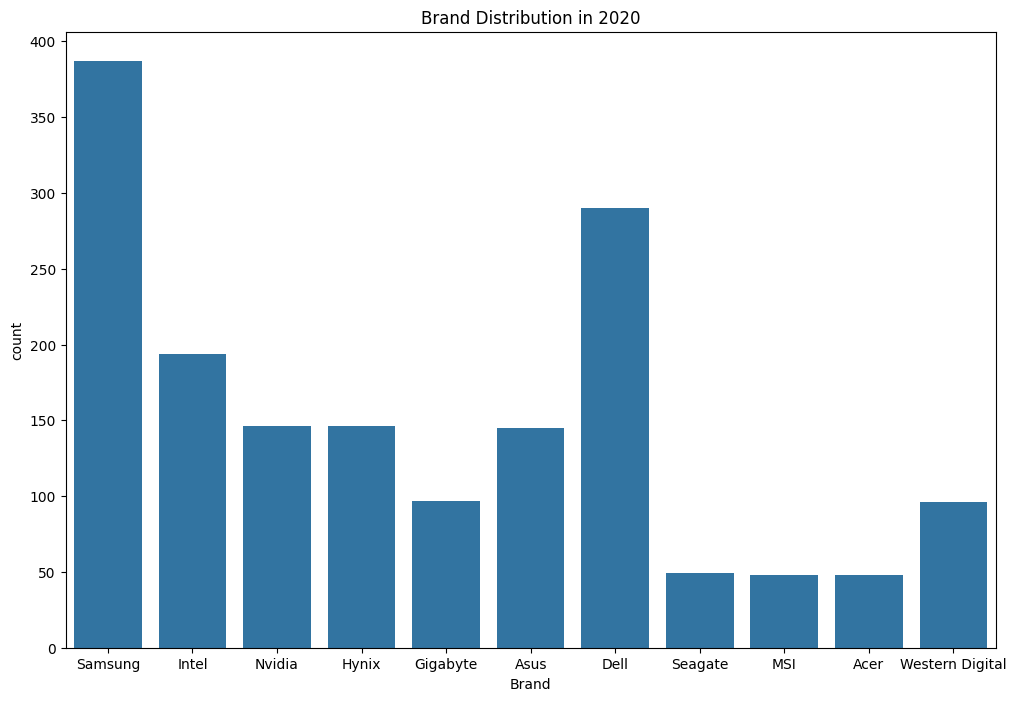

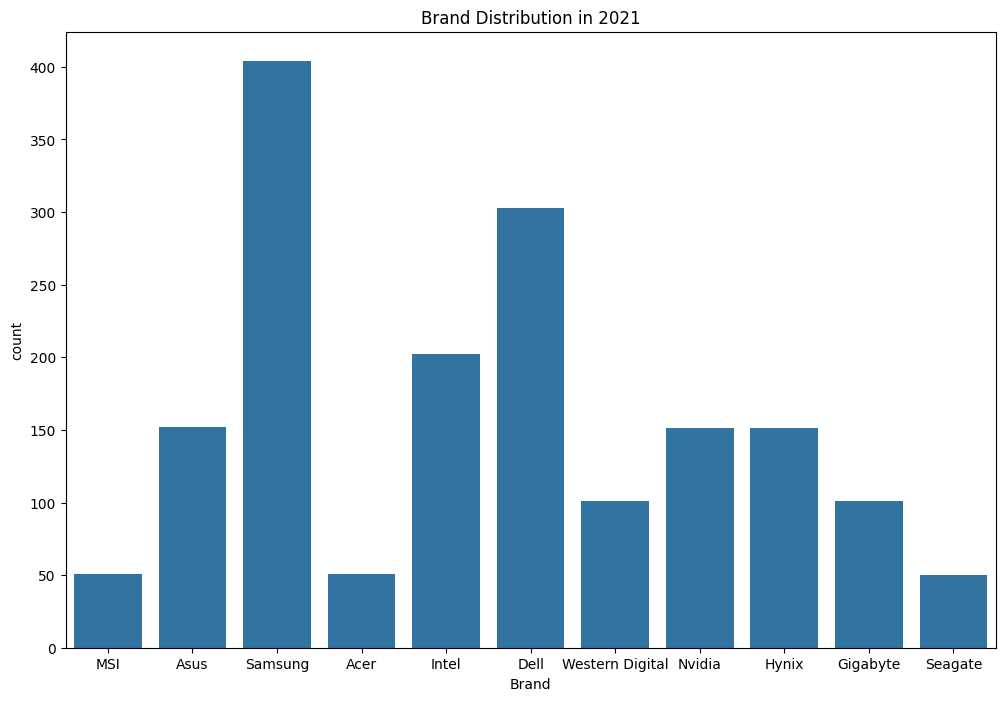

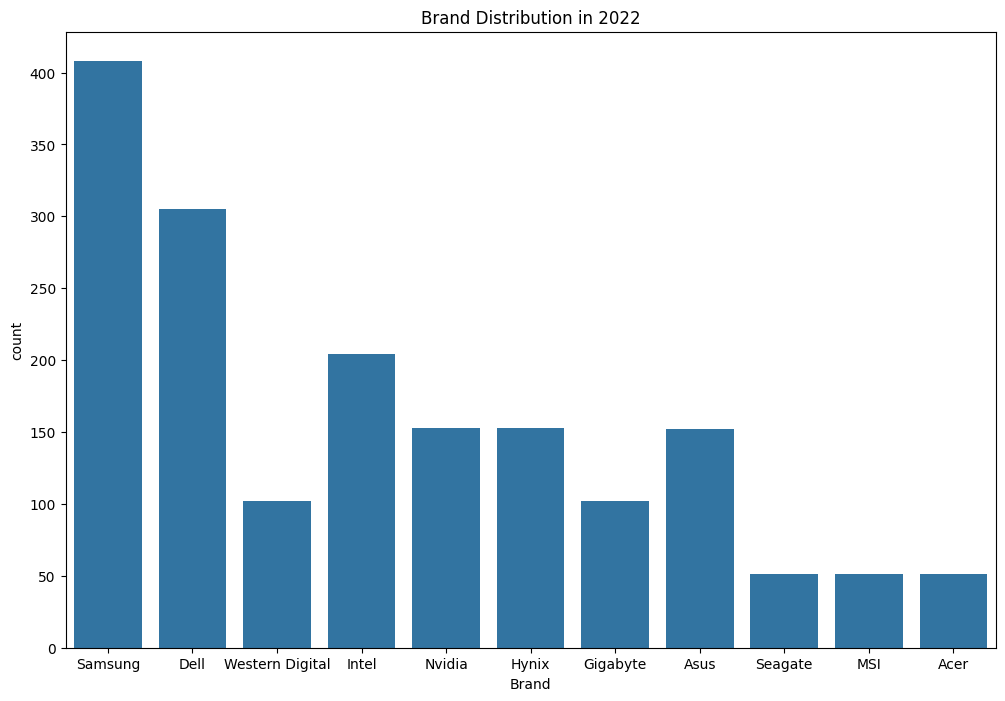

In [36]:
for year in years:
  plt.figure(figsize=(12, 8))
  sns.countplot(data=df[df['Year'] == year], x='Brand')
  plt.title(f'Brand Distribution in {year}')
  plt.show()
  print() # For Visibility

**In each of the three years, Samsung was the most sold brand**

## Question 11: What is the average total sales over the three years?

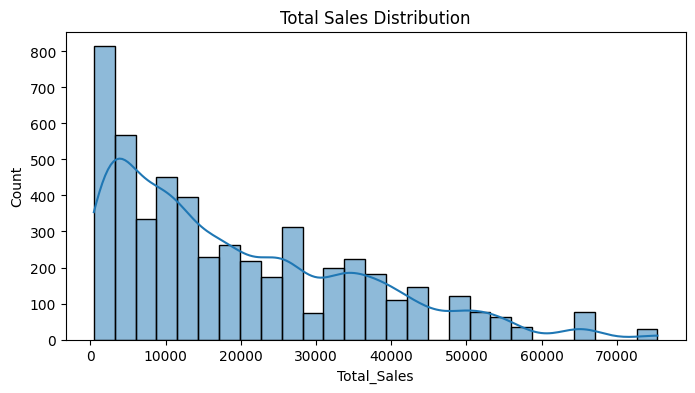

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Total_Sales', kde=1)
plt.title('Total Sales Distribution')
plt.show()

**The data is right-skewed, with many outliers beyond 50000 dollars. The average of sales over the three years is almost 20000 dollars**

## Question 12: What is the average total sales in each year?

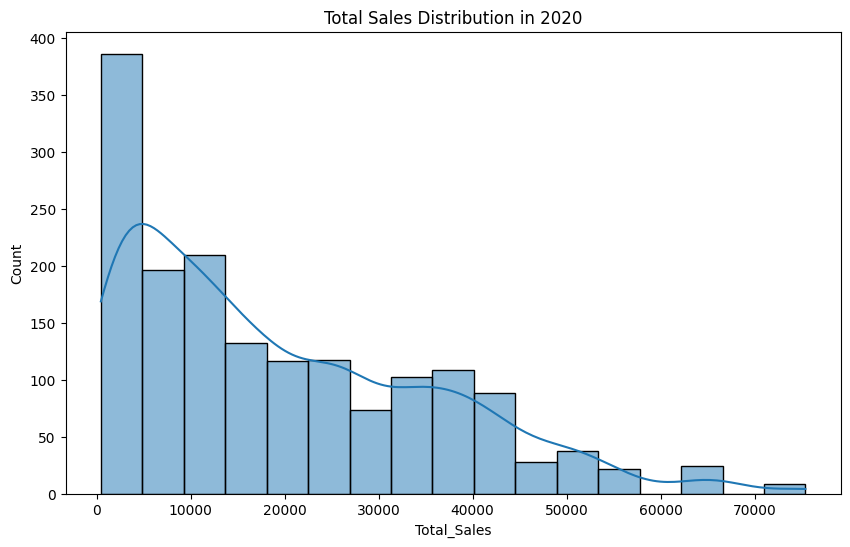

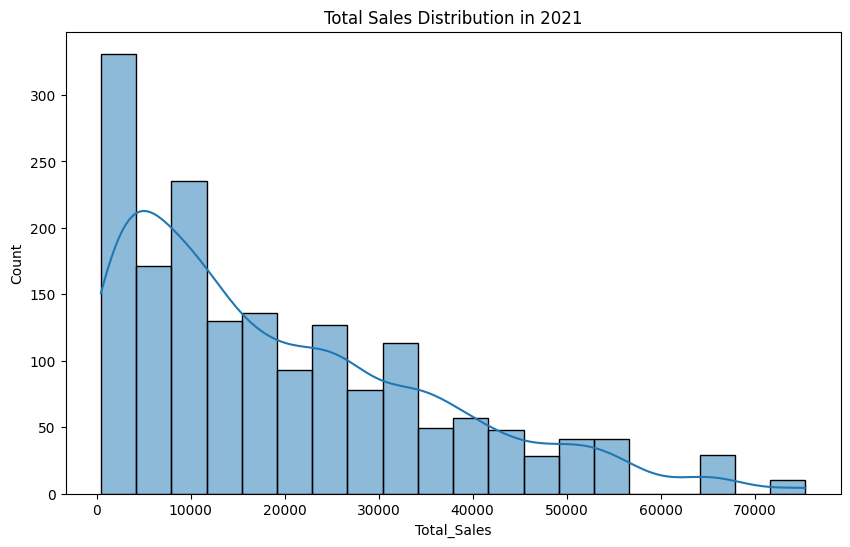

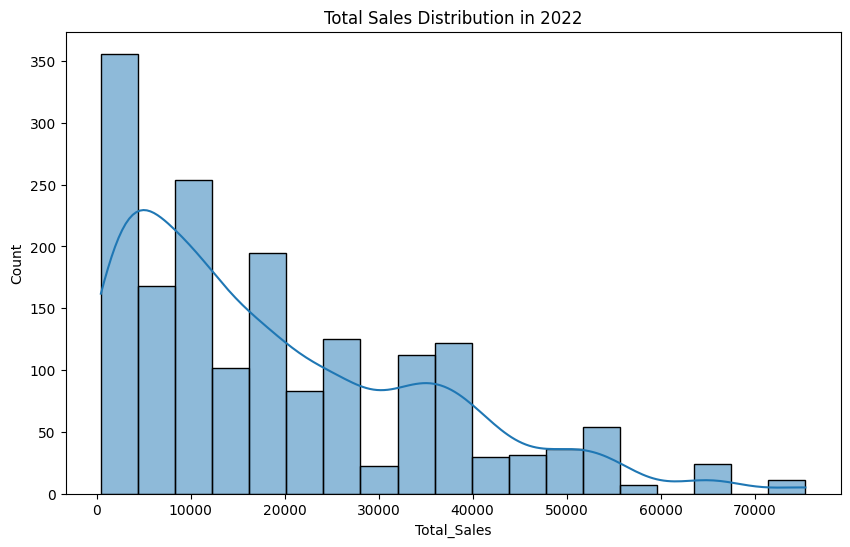

In [38]:
for year in years:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df[df['Year'] == year], x='Total_Sales', kde=1)
  plt.title(f'Total Sales Distribution in {year}')
  plt.show()
  print() # For Visibility

**In each of the three years, the data is right-skewed, having outliers beyond 60000, with an average of about 20000 dollars. 2020 sales were the highest in their means with only slight difference between the other two years**

## Question 13: What is the average total costs over the three years?

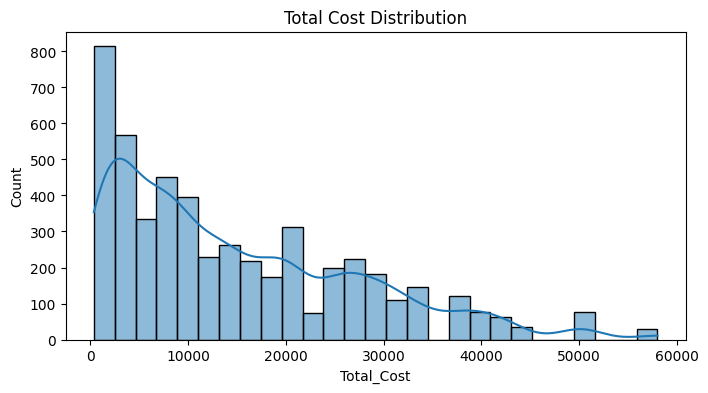

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Total_Cost', kde=1)
plt.title('Total Cost Distribution')
plt.show()

**The data is right-skewed, with outliers beyond 45000 dollars, with an average of about 15000 dollars**

## Question 14: What is the average total costs in each year?

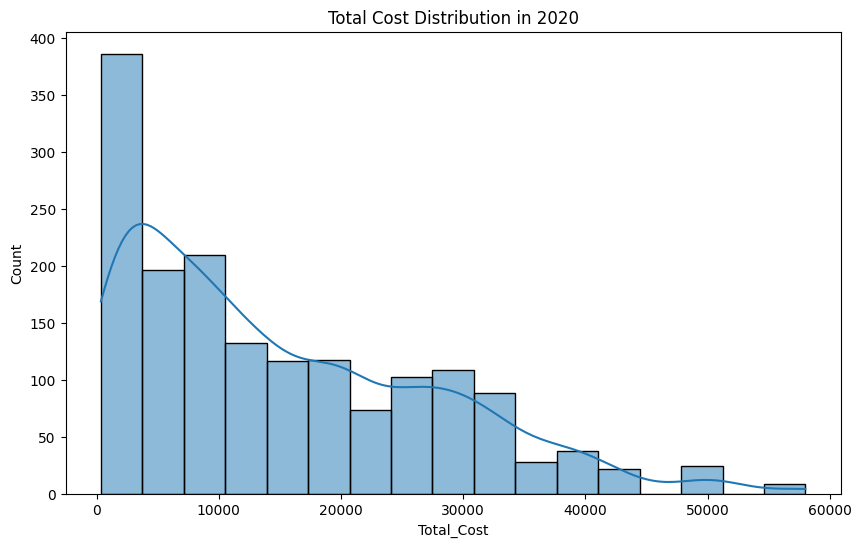

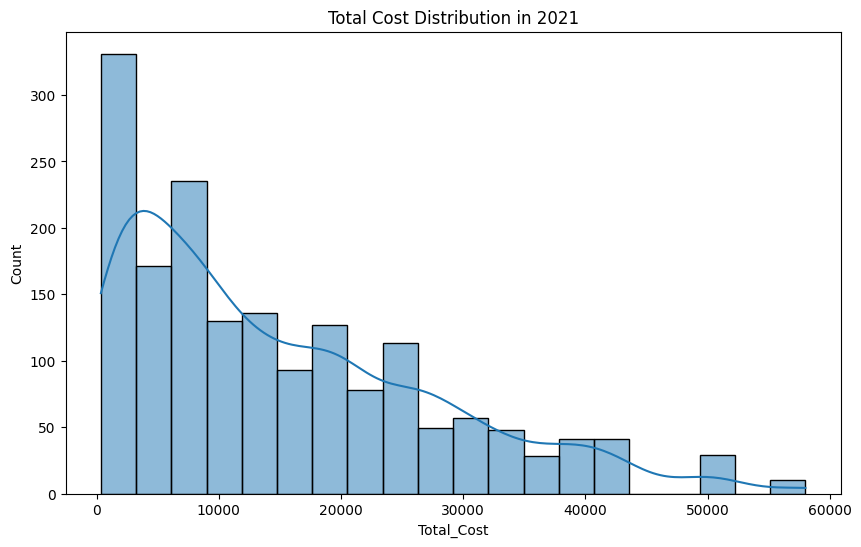

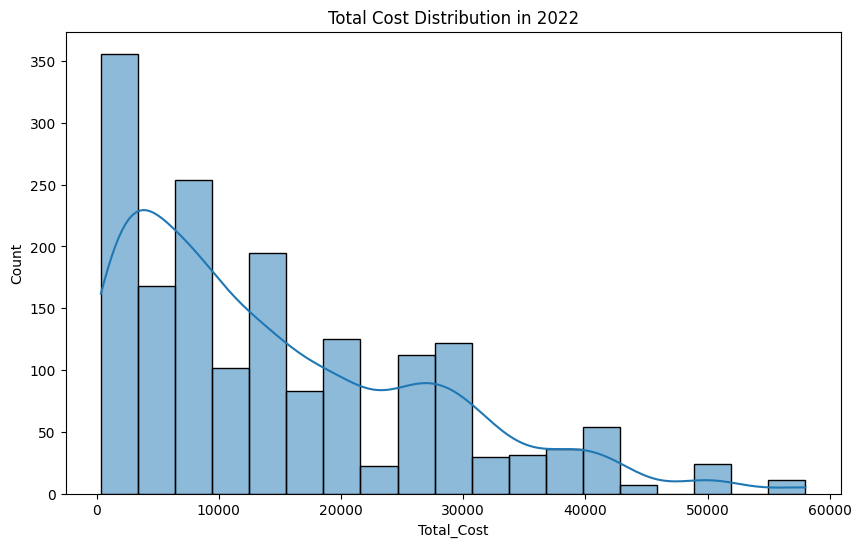

In [40]:
for year in years:
  plt.figure(figsize=(10,6))
  sns.histplot(data=df[df['Year'] == year], x='Total_Cost', kde=1)
  plt.title(f'Total Cost Distribution in {year}')
  plt.show()
  print() # For Visibility

**In each of the three years, the data is very right-skewed. There are many outliers beyond 40000 dollars, with an average of about 15000 dollars**

## Question 15: What is the average profit (or loss) over the three years?

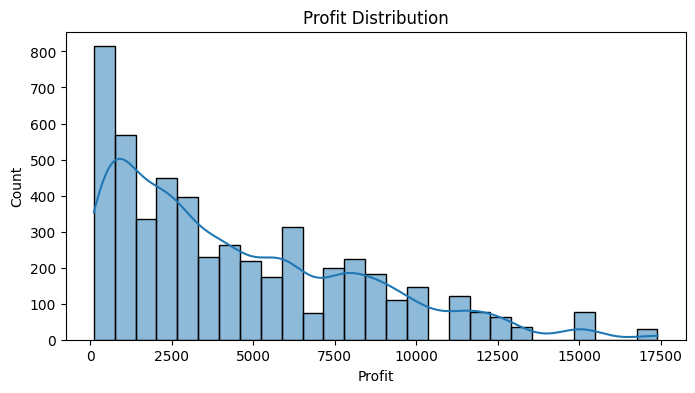

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Profit', kde=1)
plt.title('Profit Distribution')
plt.show()

**The data is very right-skewed. There are many outliers beyond 10000 dollars of profit, with an average of about 4500 dollars of profit**

## Question 16: What is the average profit (or loss) in each year?

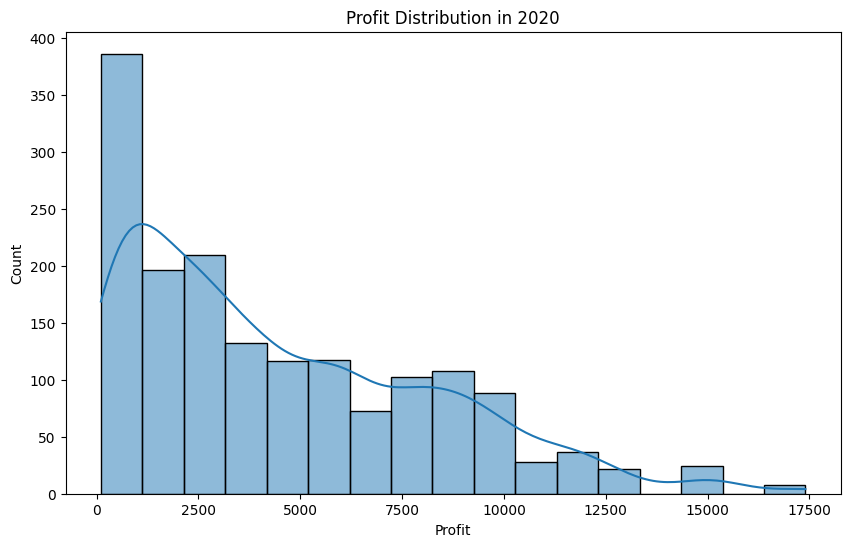

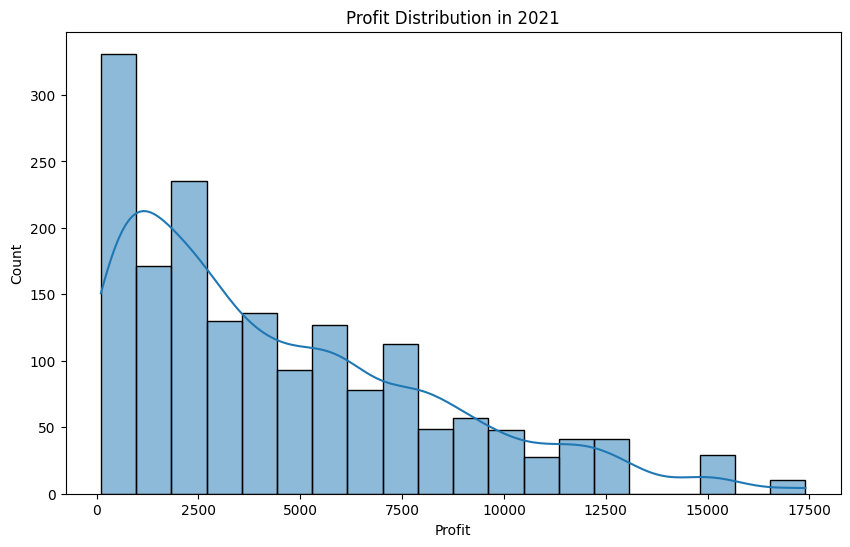

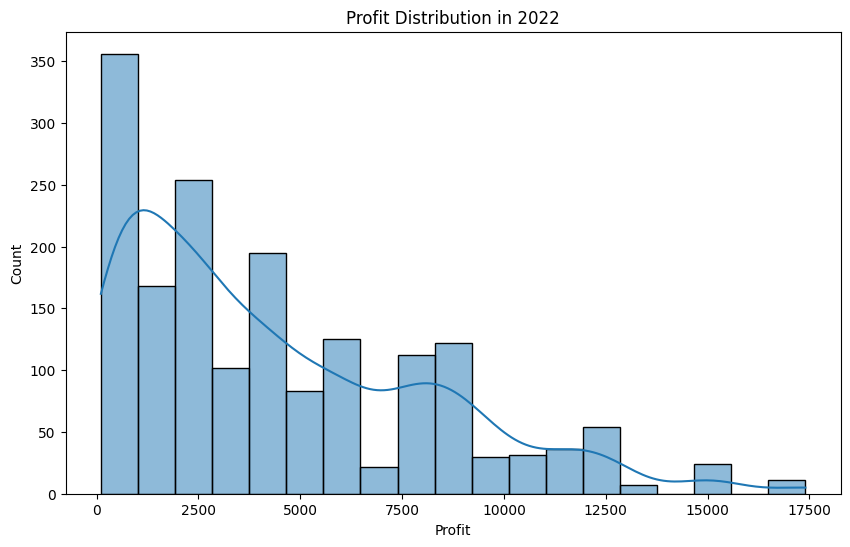

In [42]:
for year in years:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df[df['Year'] == year], x='Profit', kde=1)
  plt.title(f'Profit Distribution in {year}')
  plt.show()
  print() # For Visibility

**In each of the three years, the data is very right-skewed, with outliers beyond 10000 dollars of profit, and average of about 4500 dollars of profit**

## Question 17: What is the relation between quantity sold and the profit (or loss)?

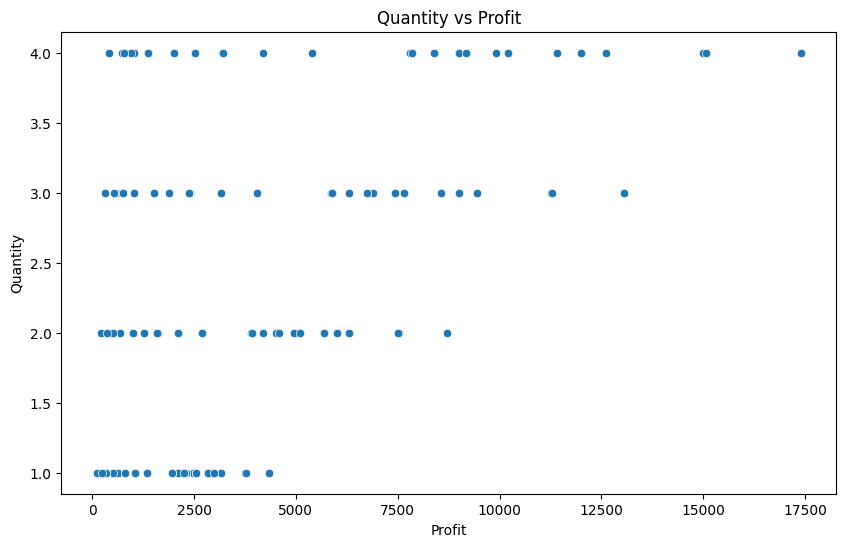

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='Quantity', x='Profit')
plt.title('Quantity vs Profit')
plt.show()

In [44]:
# get correlation coefficient
df[['Quantity', 'Profit']].corr()

,Quantity,Profit
Quantity,1.000000,0.517899
Profit,0.517899,1.000000


**There is moderate correlation between Quantity sold and profit**

## Question 18: What is the relation between total sales and the profit (or loss)?

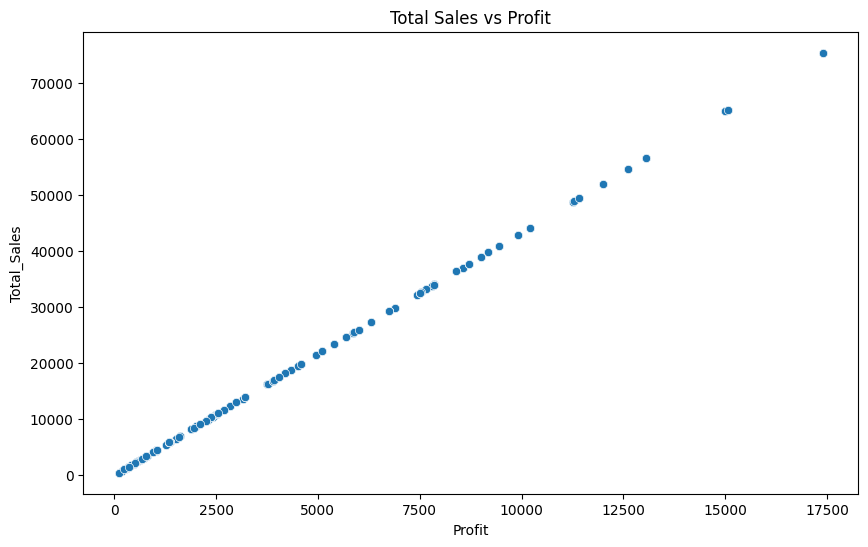

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='Total_Sales', x='Profit')
plt.title('Total Sales vs Profit')
plt.show()

In [46]:
# Get correlation coefficient
df[['Total_Sales', 'Profit']].corr()

,Total_Sales,Profit
Total_Sales,1.0,1.0
Profit,1.0,1.0


**There is very strong positive correlation between total sales and profit**

## Question 19: What is the relation between total costs and the profit (or loss)?

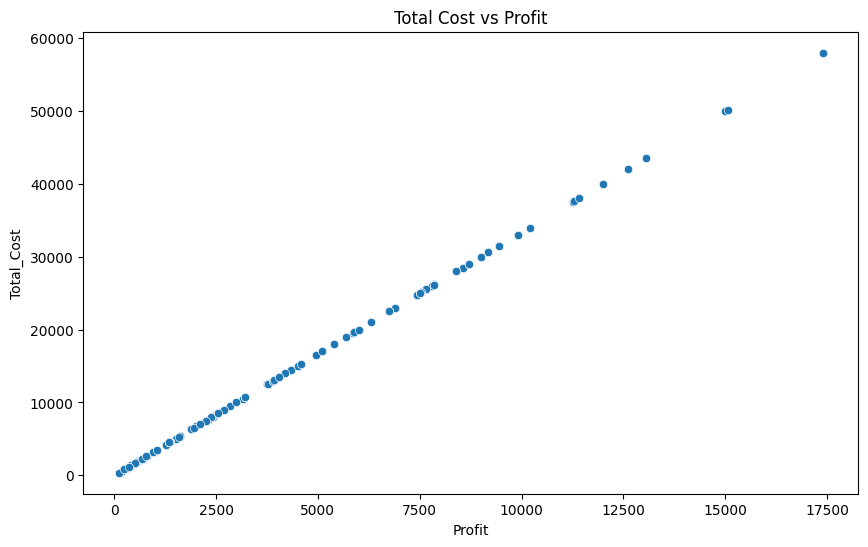

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='Total_Cost', x='Profit')
plt.title('Total Cost vs Profit')
plt.show()

In [48]:
# Get Correlation Coeffiecent
df[['Total_Cost', 'Profit']].corr()

,Total_Cost,Profit
Total_Cost,1.0,1.0
Profit,1.0,1.0


**There is a very strong positive correlation between total costs and profits**

#
---
---

# 5. Project Report

To have a complete view of our project without being distracted by codes implemented in this notebook, please view the PDF file associated with this notebook